In [20]:
pip install pandas numpy matplotlib seaborn scikit-learn nltk wordcloud

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from wordcloud import WordCloud
import re         
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer   # <-- ADD THIS LINE

In [28]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SWEETHOME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SWEETHOME\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
# Load dataset
df = pd.read_csv("Twitter_Data.csv")

# Display first 5 rows
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [30]:
# Check dataset info
df.info()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


clean_text    4
category      7
dtype: int64

In [31]:
# Drop missing values
df.dropna(inplace=True)

# Rename columns if necessary
df.columns = ['text', 'sentiment']

In [32]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|\#','', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)

df.head()

,text,sentiment,clean_text
0,when modi promised “minimum government maximum...,-1.0,modi promis minimum govern maximum govern expe...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsens continu drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcom bjp told rahul main campa...
3,asking his supporters prefix chowkidar their n...,1.0,ask support prefix chowkidar name modi great s...
4,answer who among these the most powerful world...,1.0,answer among power world leader today trump pu...


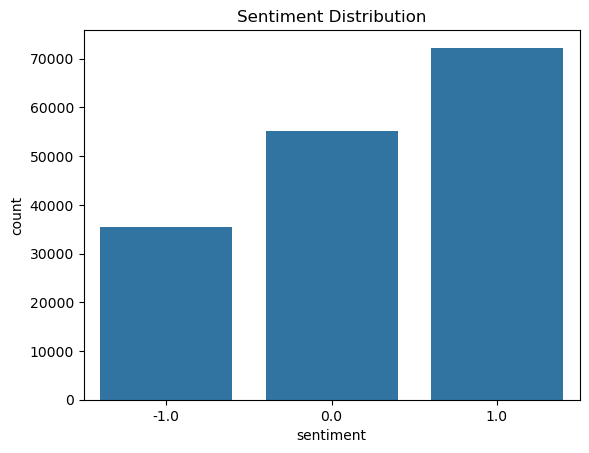

In [33]:
plt.figure()
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

In [37]:
tfidf = TfidfVectorizer(max_features=500)

X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['sentiment']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [39]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.6463152727495858
              precision    recall  f1-score   support

        -1.0       0.82      0.28      0.42      7152
         0.0       0.66      0.62      0.64     11067
         1.0       0.62      0.84      0.71     14375

    accuracy                           0.65     32594
   macro avg       0.70      0.58      0.59     32594
weighted avg       0.68      0.65      0.62     32594



In [40]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.735718230349144
              precision    recall  f1-score   support

        -1.0       0.75      0.45      0.56      7152
         0.0       0.65      0.91      0.76     11067
         1.0       0.83      0.74      0.78     14375

    accuracy                           0.74     32594
   macro avg       0.74      0.70      0.70     32594
weighted avg       0.75      0.74      0.73     32594



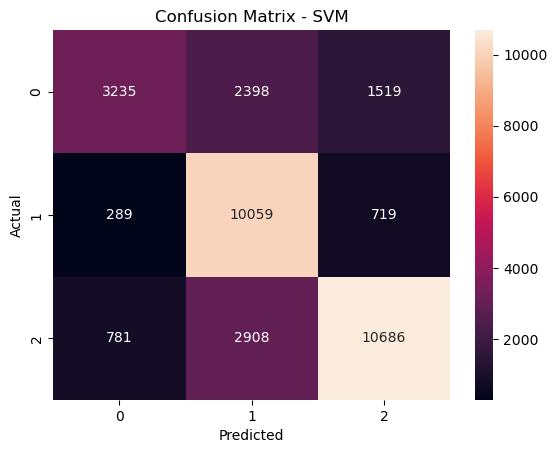

In [41]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned]).toarray()
    prediction = svm_model.predict(vector)
    return prediction[0]

print(predict_sentiment("I love this product! Amazing quality."))

1.0
